# Working with data 2019
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

### There are many other visualizations tools:
- http://seaborn.pydata.org/examples/index.html (our standard library)
- https://pandas.pydata.org/pandas-docs/stable/visualization.html (some statistical plots)
- https://bokeh.pydata.org/en/latest/docs/gallery.html (interactive)
- https://plot.ly/ 



## PLAN FOR THE WEEK
### MONDAY: Data processing
Coding:
1. Leftover from last week: 2.3 Code (II): Functions, for-loops and if-else statements (in day 3)
2. Pandas (III): Groupby

Data processing:
1. Research workflow
2. Tidy data: Basics

### WEDNESDAY: Data processing
3. Tidying data: Pivoting and melting dataframes
4. Combining data: Merging and concatenating dataframes

### FRIDAY: Data visualization
1. Principles of data visualization
2. The pylab and seaborn libraries
3. CATPLOT: One quantitative variable (+one or more qualitative)
4. RELPLOT: Two quantitative variables (+one or more qualitative)
5. LMPLOT: Regression plot
6. Other plots: Joinplot, pointplot, pairplot and heatmap
7. Network data
8. When to use log-scale
9. How to create an effective visualization

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np

def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("../4_5_TidyData/data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed

## Recap on tidy data
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

# 1 Data visualization: A picture is worth a thousand words

Why do we visualize information?
- It's easier to read than a table
- We use it to:
    - Communicate information
    - Support our points

## 1.1 Example: Datasaurus

In [2]:
df = pd.read_csv("../class_data/DatasaurusDozen.tsv",sep="\t")

#Print some statistics (this line is overcomplicated to avoid showing too much info)
stats = pd.concat([df.groupby("dataset").mean(),df.groupby("dataset").std()],axis=1)
stats.columns = ["Mean_x","Mean_y","Std_x","Std_y"]
stats

,Mean_x,Mean_y,Std_x,Std_y
dataset,,,,
away,54.266100,47.834721,16.769825,26.939743
bullseye,54.268730,47.830823,16.769239,26.935727
circle,54.267320,47.837717,16.760013,26.930036
dino,54.263273,47.832253,16.765142,26.935403
dots,54.260303,47.839829,16.767735,26.930192
h_lines,54.261442,47.830252,16.765898,26.939876
high_lines,54.268805,47.835450,16.766704,26.939998
slant_down,54.267849,47.835896,16.766759,26.936105
slant_up,54.265882,47.831496,16.768853,26.938608


/opt/anaconda/anaconda3/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


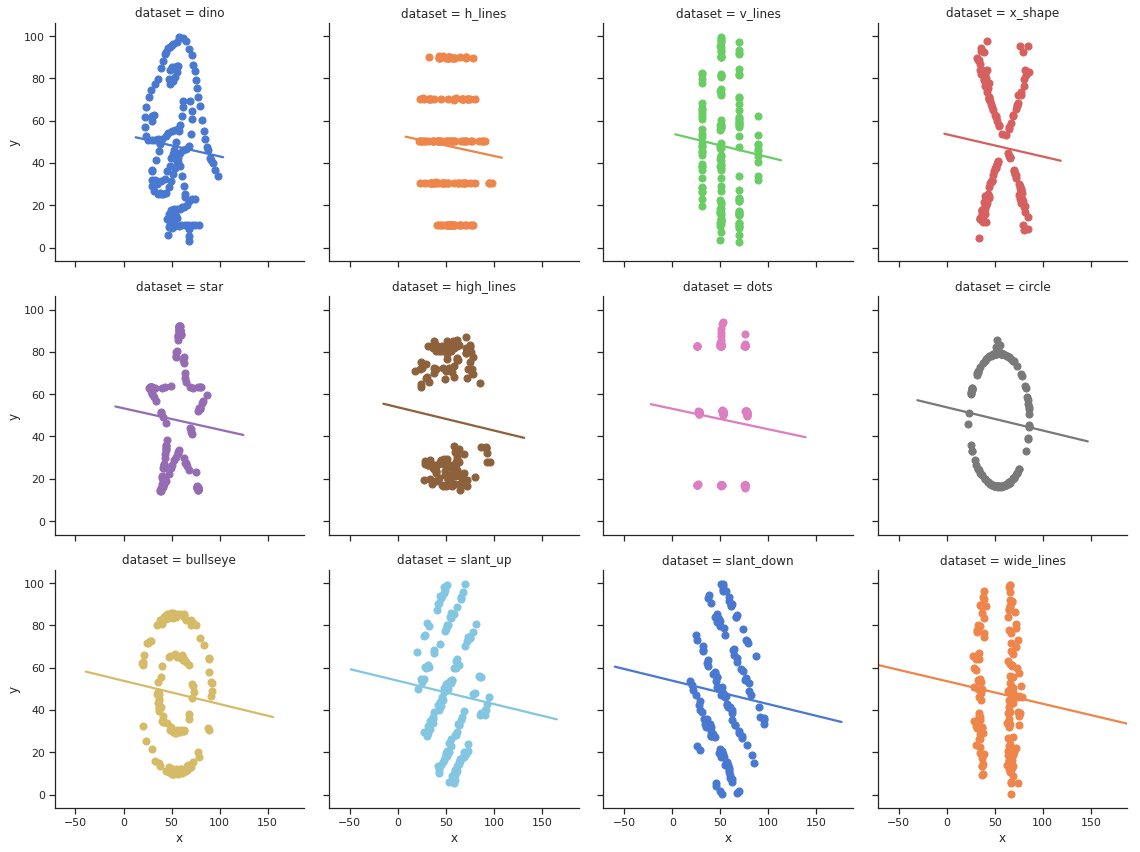

In [3]:
sns.set(style="ticks")
#Delete a dataset to have 12 instead of 13
df = df.loc[df["dataset"]!="away"]
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, palette="muted", size=4, 
           scatter_kws={"s": 50, "alpha": 1})

## 1.2 Principles of data visualization for quantitative information
- You can use different channels

- Some channels are easily interpreted by our brain

- Some can be combined better than others

### Now all plots are equally effective

Text(0.5, 1.0, 'How much more saturation?')

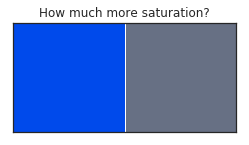

In [4]:
plt.figure(figsize=(4,2))
plt.bar([1,2],[2,2],width=[1,1],color=[(0/255,74/255,235/255),(103/255,112/255,132/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0.5,2.5)
plt.title("How much more saturation?")

Text(0.5, 1.0, 'How much darker?')

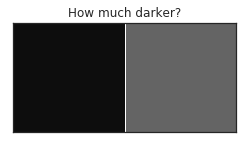

In [5]:
plt.figure(figsize=(4,2))
plt.bar([1,2],[2,2],width=[1,1],color=[(12.5/255,12.5/255,12.5/255),(100/255,100/255,100/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0.5,2.5)
plt.title("How much darker?")

(0.6, 2.1)

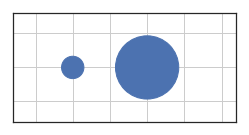

In [6]:
plt.figure(figsize=(4,2))
plt.scatter([1,1.5],[1,1],s=[500,4000])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.xlim(0.6,2.1)

(0.25, 4.5)

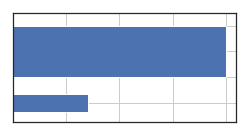

In [7]:
plt.figure(figsize=(4,2))
plt.barh([1,3],[2*np.sqrt(0.5),4],height=[np.sqrt(0.5),2])
plt.yticks([1,2,3,4])
plt.xticks([0,1,2,3,4])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0.25,4.5)

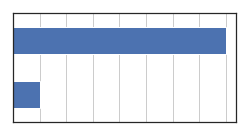

In [8]:
plt.figure(figsize=(4,2))
plt.barh([1,2],[1,8],0.5)
plt.xticks([1,2,3,4,5,6,7,8])
plt.yticks([])
plt.tick_params(axis='both', left=False, top=False,right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
plt.grid(True)
plt.ylim(0.5,2.5)
plt.show()

### 1.2.1 Channels to map information in a figure

In [9]:
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/channels.png",width=1000)

### 1.2.2 Relative errors of different channels

In [10]:
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/cleveland.png",width=1000)

In [11]:
#https://en.wikipedia.org/wiki/Stevens'_power_law
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/steven.png",width=500)

---

# 2. The pylab (matplotlib) and seaborn libraries

In [12]:
import pylab as plt
import seaborn as sns

No handles with labels found to put in legend.
No handles with labels found to put in legend.


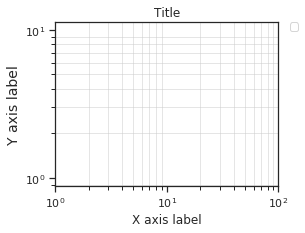

In [13]:
#pylab
#create a figure with a size (measured in inches!)
plt.figure(figsize=(4,3)) 

#add a title to the figure
plt.title("Title")

#add a label in the x and y axis
plt.xlabel("X axis label")
plt.ylabel("Y axis label",fontsize=14) #we can add the font size to all the functions where we pass text

#add a legend (by default in seaborn)
plt.legend()

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#use log scale in the x and y axis
plt.xscale("log")
plt.yscale("log")

#trim the x axis between 1 and 100 (to make it look like you want, it depends on your specific values)
plt.xlim((1,100))

#add minor ticks (vertical/horizontal lines) with tranparency 50%
plt.grid(which='minor',alpha=0.5)

#take out the grid
plt.grid(False)

#save the figure (I CAN'T STRESS ENOUGH: SAVE AS PDF FOR ANY PAPER YOU WRITE!)
plt.savefig("figures/name_of_figure.pdf") 

#Make sure that the labels do not go outside the figures
plt.tight_layout()

#show the figure (not required in jupyter notebooks but still good to write it)
plt.show()


In [14]:
#Change the size of all fonts
sns.set(font_scale=1.2) #20% larger fonts

#Add grid
sns.set_style("whitegrid")

#Take out the vertical or horizontal grid and adjust the axis of the figure (trim them)
sns.despine(trim=True)

#Important link with many options for the visualizations
#http://seaborn.pydata.org/tutorial/aesthetics.html

<Figure size 432x288 with 0 Axes>

### Slightly unrelated
- Organize your workflow: Different notebooks for cleaning and analyzing the data, write comments of what you do
- Organize your files: Make at least a `data` folder and a `figures` folder

In [15]:
df = read_our_csv()
df["C"] = df["METRO_ID"].str.slice(0,2)
df = df.dropna(subset=["GDP_PC"])
df.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,C
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77,AT
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83,AT
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82,AT
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24,AT
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20,AT


# 3 CATPLOT: Information about ONE quantitative variable
- Distributions: Histogram, violinplot and box-plot
- Mean values: Bar plot

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.catplot.html
Catplot calls specific functions, like violinplot (https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot), every argument that you could pass to violinplot you can also pass to catplot

## 3.1 DISTRIBUTIONS
- The distribution is the relationship between the value and the frequency (value 7, frequency 100 times)
- We usually plot the relative frequency (the fraction) instead of the value
- When we do this, the area below the curve is equal to 1.

- When are we interested on this:
    - In the description phase of our research, to see how our data looks like
    - To see if the assumptions of our statistics hold (histograms)
    - Many times we want to plot the distributions (or a summary of it) of a quantitative variable in terms of a qualitative variable (for instance, distribution of GDP in many countries)
    
 
    

In [16]:
#Data example: If you draw two dice, then you will get a lot of 7s, many 6s and 8s, some 5s and 9s, a few 4s and 10st, very few32s and 11st and almost no 2s ans 12st.
#This data is discrete

from collections import Counter

#Roll two dices 10000 times
dice_rolls = np.random.randint(1,7,10000) + np.random.randint(1,7,10000)
#Count the number of each element to create the distribution
Counter(dice_rolls)

Counter({2: 263,
         3: 572,
         4: 879,
         5: 1073,
         6: 1393,
         7: 1679,
         8: 1365,
         9: 1103,
         10: 838,
         11: 556,
         12: 279})

### 3.1  -  HISTOGRAM 
- A representation of the visualization
- It's not a good idea to have many of this 

In [17]:
#If missing values or infinite values you need to drop them
data_visualize = df["GDP_PC"]
data_visualize = data_visualize[np.isfinite(data_visualize)]

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


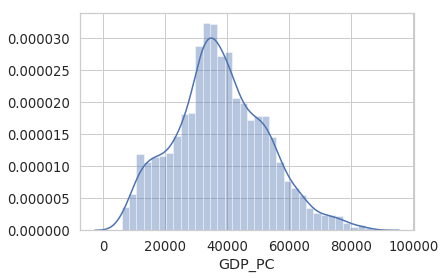

In [18]:
sns.distplot(df["GDP_PC"])

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1000, 90000)

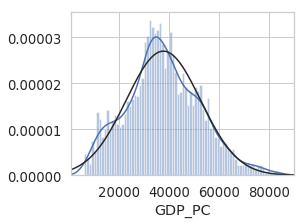

In [19]:
from scipy.stats import norm,lognorm,expon

#And we can visualize it with a histogram
plt.figure(figsize=(4,3))

#Histogram
sns.distplot(df["GDP_PC"], 
             fit=norm, 
             kde=True,
             rug=False,
             norm_hist=True,
             bins=range(1000,90000,1000)) #no missing values
plt.xlim(1000,90000)

### 3.1  -  BOXPLOT
- A summary of the distribution. 
- They show if the means of two\ distributions are different or not



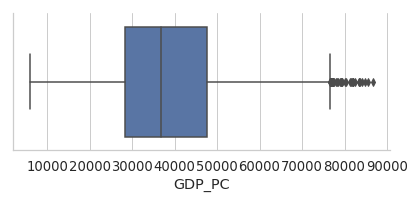

In [20]:
sns.catplot(x="GDP_PC",data=df,kind="box",
            aspect=2,height=3)

### 3.1  -  VIOLINPLOT
- A summary of the distribution
- Only makes sense for CONTINUOUS data


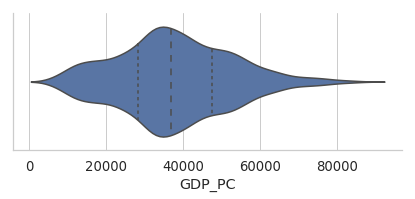

In [21]:
sns.catplot(x="GDP_PC",data=df,kind="violin",inner="quartiles",
            aspect=2,height=3)

### 3.1  -  BOXENPLOT
- A summary of the distribution
- Only makes sense for CONTINUOUS data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


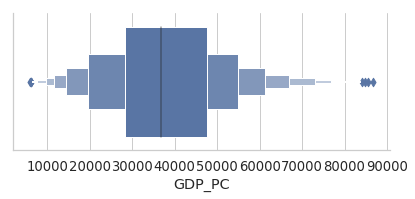

In [22]:
sns.catplot(x="GDP_PC",data=df,kind="boxen",
            aspect=2,height=3)

### 3.1  -  SWARM/STRIP PLOT
- Shows each point
- Only makes sense for SMALL CONTINUOUS data


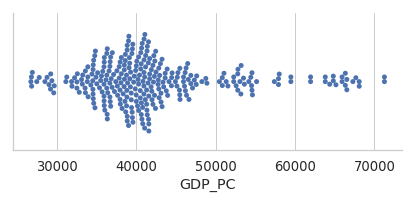

In [23]:
sns.catplot(x="GDP_PC",data=df.head(300),kind="swarm",
            aspect=2,height=3)

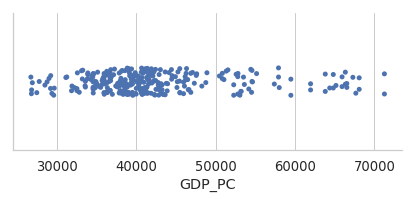

In [24]:
sns.catplot(x="GDP_PC",data=df.head(300),kind="strip",
            aspect=2,height=3)

## 3.2 MEANS/SUMS: BAR-PLOT
- When are we interested on this:
    - We only are interested in one individual value either because 
        - We only have the value (e.g. the number of car accidents)
        - We are not so interested in the distribution and we don't want to clutter the plot. E.g. the mean number of car accidents. We need error bars in this case!
        
- This plot only make sense if we have many categories

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


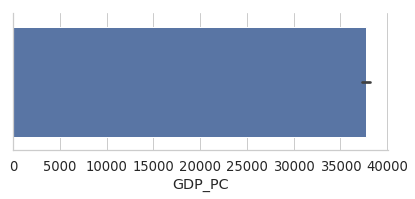

In [25]:
sns.catplot(x="GDP_PC",data=df,kind="bar",
            aspect=2,height=3)

**If we want to count, that's a specific type of barplot**

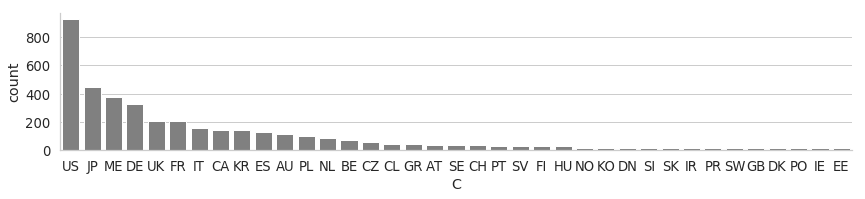

In [26]:
sns.catplot(x="C",data=df,kind="count",
            aspect=4,height=3,color="gray",
           order = df['C'].value_counts().index)

# Adding one categorical variable
- Histogram, violinplot and box-plot
- Bar plot

In [27]:
df_italy = df.loc[df["C"].isin(["IT","SE"])]
df_italy.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,C
1530,IT001,Rome,2000,10.36,NaN,NaN,47836.13,NaN,251.93,122766.44,0.33,651.06,NaN,11.05,IT
1531,IT001,Rome,2001,NaN,NaN,NaN,48928.59,NaN,250.04,124464.71,0.38,655.97,NaN,9.98,IT
1532,IT001,Rome,2002,NaN,NaN,NaN,49323.37,NaN,248.15,122641.81,0.36,660.98,NaN,7.93,IT
1533,IT001,Rome,2003,NaN,NaN,NaN,48662.53,NaN,246.25,120883.80,0.46,666.08,NaN,8.03,IT
1534,IT001,Rome,2004,NaN,NaN,NaN,50172.53,NaN,244.34,122254.22,0.50,671.29,NaN,7.47,IT


## 3.2 MEANS: BARPLOT

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


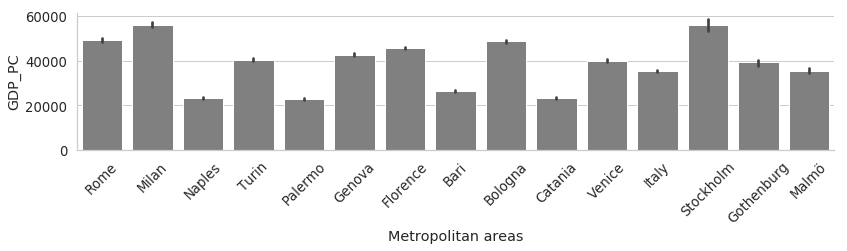

In [28]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="bar",
            aspect=4,height=3,color="gray")
g.set_xticklabels(rotation=45)

## 3.1 BOX/VIOLIN/BOXEN/SWARM/STRIP-PLOT

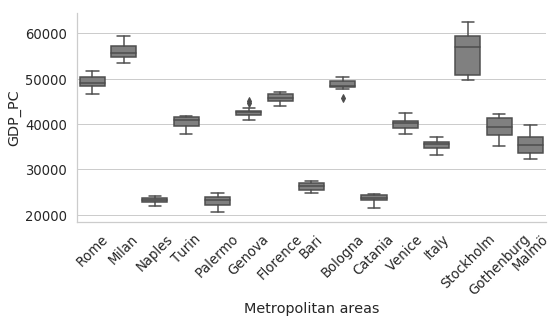

In [29]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="box",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


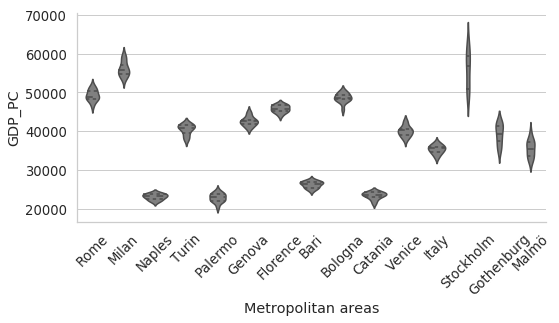

In [30]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="violin",inner="quartiles",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


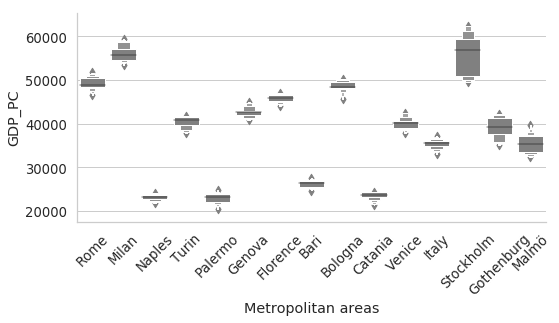

In [31]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="boxen",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


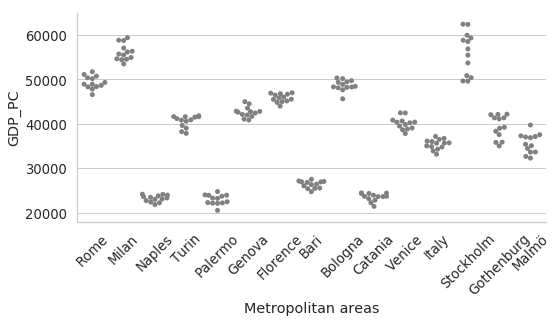

In [32]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="swarm",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


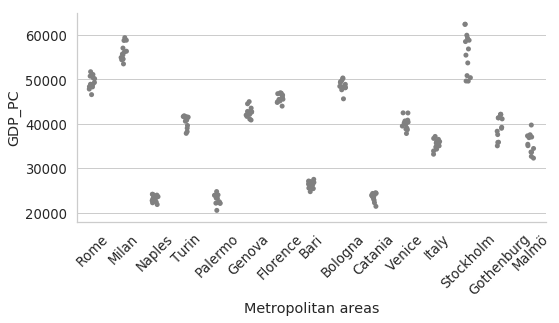

In [33]:
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_italy,kind="strip",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


# Adding an extra categorical variable using HUE
- This works for all of them

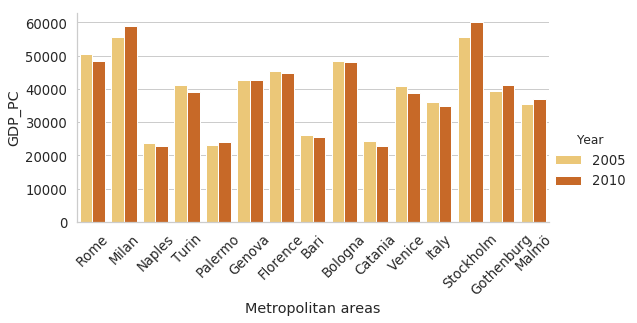

In [34]:
df_2010_15 = df_italy.loc[df_italy["Year"].isin([2005,2010]),:]

g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_2010_15,kind="bar",hue="Year",palette="YlOrBr",
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


## We can add an extra variable with COL
- Example for boxplot but it works for all

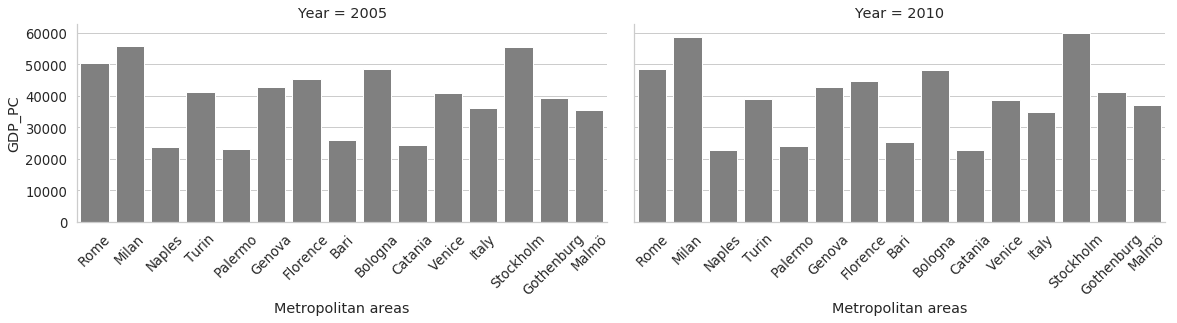

In [35]:
#In this case it doesn't make sense because you don't have cases of Rome in Sweden and Malmo in Italy, but to get the idea
g = sns.catplot(x="Metropolitan areas",y="GDP_PC",data=df_2010_15,kind="bar",col="Year",col_wrap=4,#maximum number of plots in a column
            aspect=2,height=4,color="gray")
g.set_xticklabels(rotation=45)


# 4 RELPLOT: Information about TWO quantitative variables
- Scatter plot
- Line plot

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.relplot.html


## 4.1 LINE PLOT
This is the most useful plot when the x variable is time. 
- Used to visualize relationship between two variables, one of them time

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


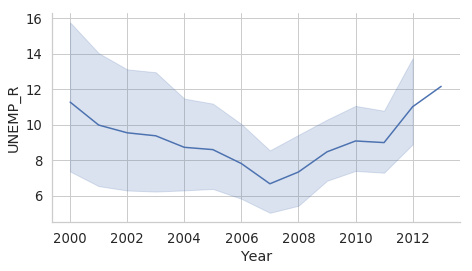

In [36]:
g = sns.relplot(x="Year", y="UNEMP_R", data=df_italy, kind="line", 
                aspect=1.7,height=4)


## 4.2 SCATTER PLOT
This is the most useful plot. 
- Used to visualize relationship between two variables

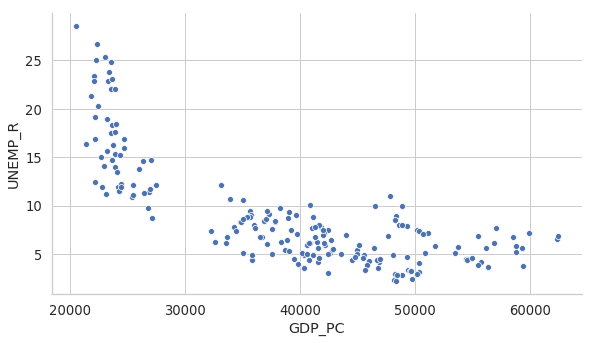

In [37]:
g = sns.relplot(x="GDP_PC", y="UNEMP_R", data=df_italy, kind="scatter", 
                aspect=1.7,height=5)


# Adding an extra categorical variable using HUE
- This works for all of them

## 4.1 LINE PLOT

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


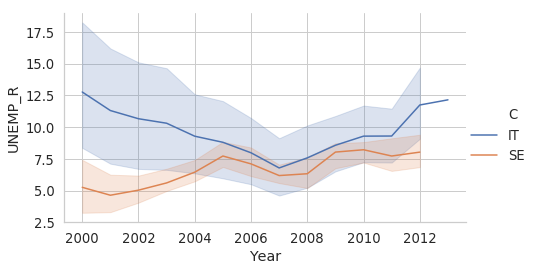

In [38]:
g = sns.relplot(x="Year", y="UNEMP_R",hue="C", data=df_italy, kind="line", 
                aspect=1.7,height=4)


## 4.2 SCATTER PLOT

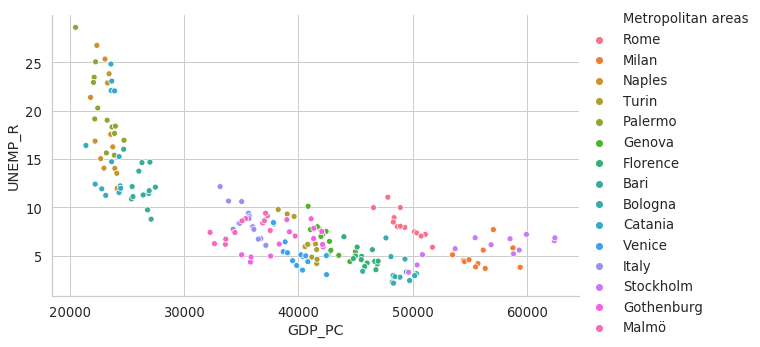

In [39]:
#Having more than 3-4 colors do not usually make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",hue="Metropolitan areas", data=df_italy, kind="scatter", 
                aspect=1.7,height=5)


# Adding an extra categorical variable using the SIZE
- This works for all of them

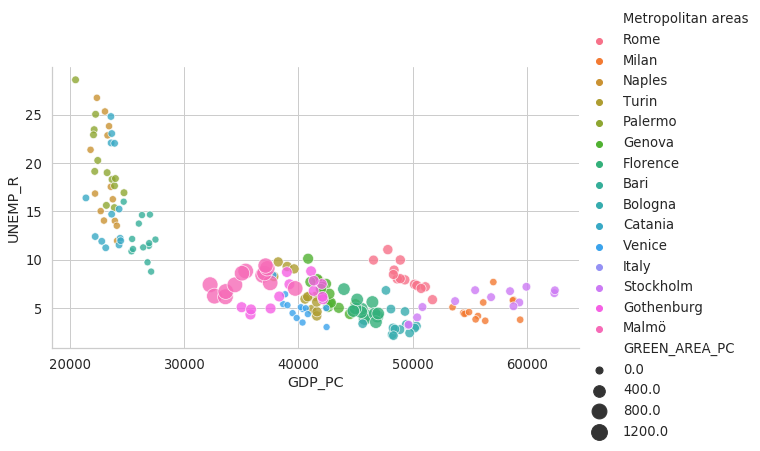

In [40]:
#Having more than 3-4 colors do not usually make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",hue="Metropolitan areas", data=df_italy, kind="scatter", size="GREEN_AREA_PC",
                sizes=(50,250),alpha=0.8,
                aspect=1.7,height=5)


# Adding an extra categorical variable using COL
- This works for all of them

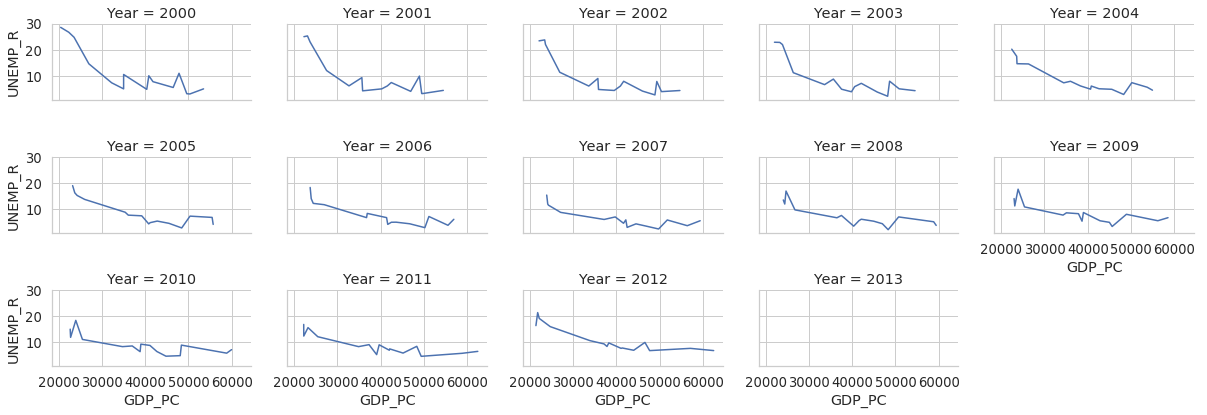

In [41]:
#Having more than 2-3 lines do not really make sense
g = sns.relplot(x="GDP_PC", y="UNEMP_R",col="Year", data=df_italy, kind="line", col_wrap=5,
                aspect=1.7,height=2)


# 5. LMPLOT: Regression plots
- Useful when you think there is a relationship between two variables

## READ THE DOCS!!! https://seaborn.pydata.org/generated/seaborn.lmplot.html


/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


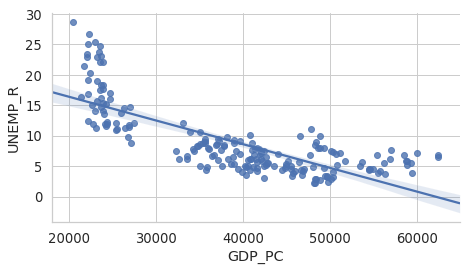

In [42]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R", data=df_italy,
                aspect=1.7,height=4)


** And we can add a trendline **
- default: Fit linear
- order=2: Fit 2nd order polynomial
- logx=True -> Fit exponential
- robust=True -> Fit linear with outliers
- lowess=True -> trend line
- logistic=True -> fit logistic (y must be between 0 and 1)

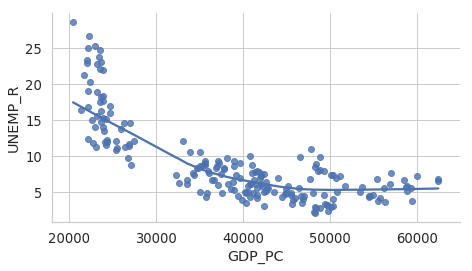

In [43]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R", data=df_italy,lowess=True,
                aspect=1.7,height=4)


## Adding an extra categorical variable using HUE


/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


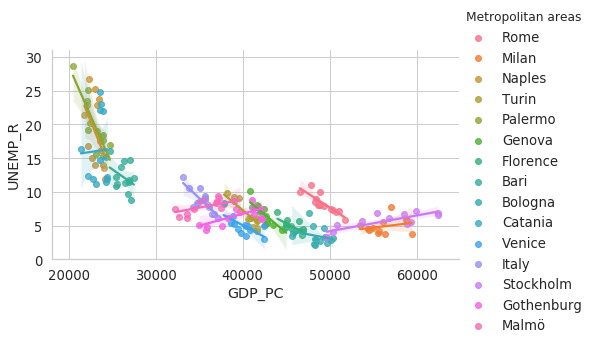

In [44]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R",hue="Metropolitan areas",data=df_italy,truncate=True, #truncate truncates to the range
                aspect=1.7,height=4)


## Adding an extra categorical variable using COL


/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


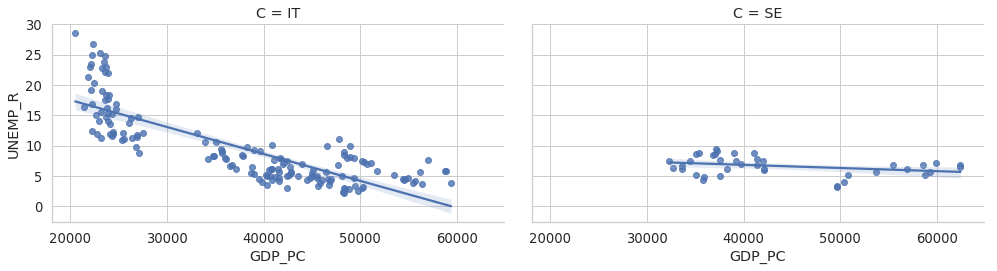

In [45]:
#Having more than 2-3 lines do not really make sense
g = sns.lmplot(x="GDP_PC", y="UNEMP_R",col="C",col_wrap=5,
               data=df_italy,truncate=True, #truncate truncates to the range
                aspect=1.7,height=4)


## 6 OTHER PLOTS
This is useful to see the relationship between many variables

## 6.1 JOINTPLOT = SCATTER + MARGINAL DISTRIBUTION
- Arguments like hue or col WILL NOT work here

/opt/anaconda/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


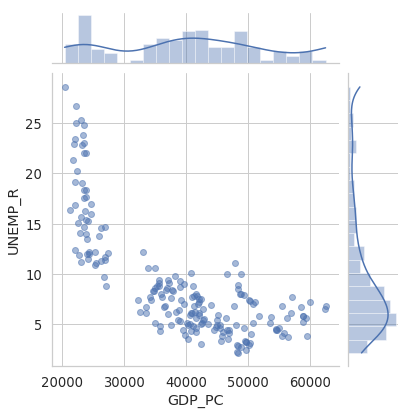

In [46]:
sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df_italy,
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}),
              size=6,alpha=0.5)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


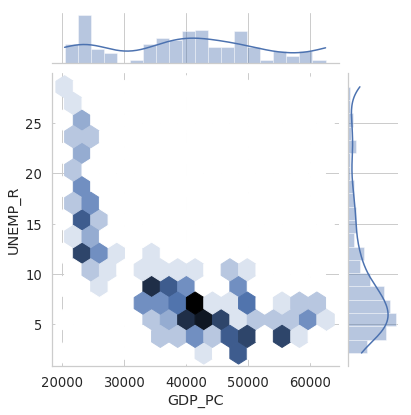

In [47]:
sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df_italy,kind="hex",
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}), 
              gridsize = 15,size=6)


# 6.2 POINTPLOT
- Similar to a line plot, but shows the central tendency

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


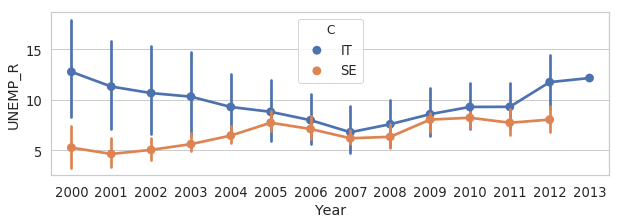

In [48]:
plt.figure(figsize=(10,3))
sns.pointplot(x="Year",y="UNEMP_R",hue="C",data=df_italy)


## 6.3 SCATTER MATRIX
- Useful to describe the data, find outliers, etc

In [49]:
df_subset = df_italy.loc[:,["Metropolitan areas","CO2_PC","GDP_PC","GREEN_AREA_PC","POP_DENS","UNEMP_R"]].dropna()


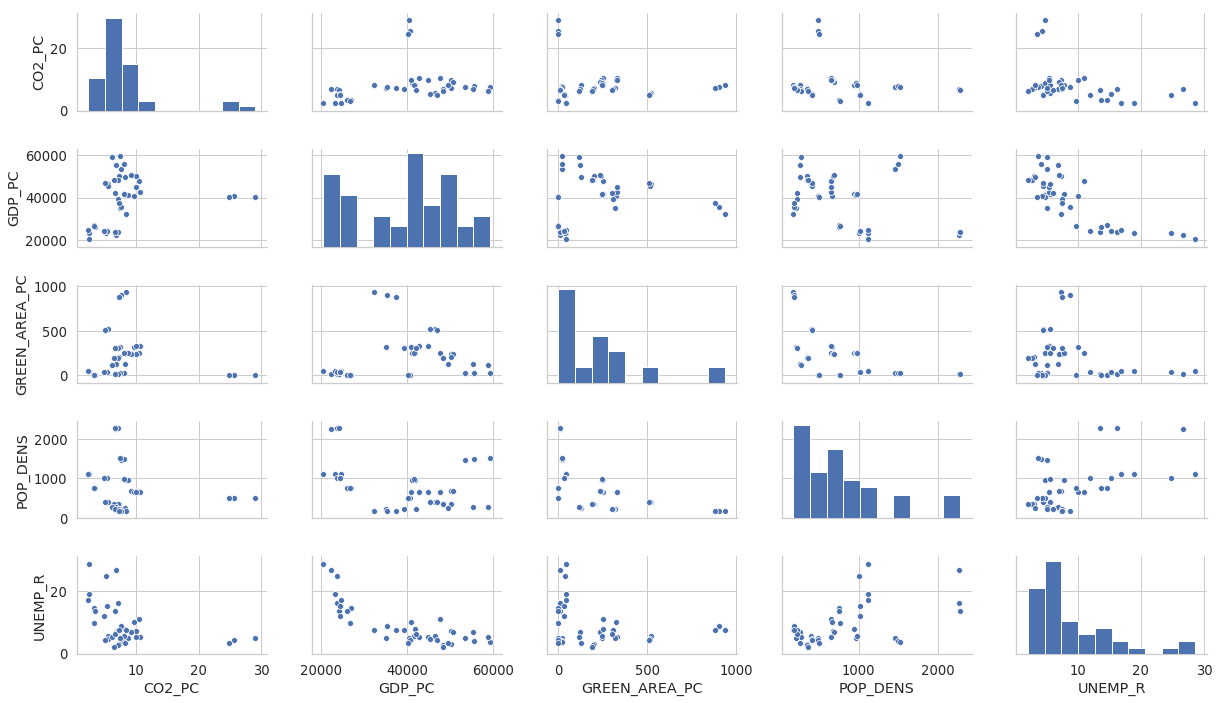

In [62]:
sns.pairplot(df_subset,
            aspect=1.7,height=2)#,hue="Metropolitan areas")


# 6.4 HEATMAP
This is useful to see the correlation between many variables in a summarized way

In [51]:
df_subset.head()

VAR,Metropolitan areas,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
1530,Rome,10.36,47836.13,251.93,651.06,11.05
1535,Rome,9.98,50376.28,242.42,676.60,7.35
1538,Rome,9.11,50748.42,236.61,693.20,7.04
1545,Milan,7.61,53499.91,24.21,1458.80,5.10
1550,Milan,8.01,55725.72,23.59,1496.90,4.19


In [52]:
corr = df_subset.corr()
corr

VAR,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
VAR,,,,,
CO2_PC,1.000000,0.243586,-0.098472,-0.173814,-0.382599
GDP_PC,0.243586,1.000000,0.160736,-0.384807,-0.789176
GREEN_AREA_PC,-0.098472,0.160736,1.000000,-0.531218,-0.298933
POP_DENS,-0.173814,-0.384807,-0.531218,1.000000,0.536701
UNEMP_R,-0.382599,-0.789176,-0.298933,0.536701,1.000000


In [53]:
corr**2

VAR,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
VAR,,,,,
CO2_PC,1.000000,0.059334,0.009697,0.030211,0.146382
GDP_PC,0.059334,1.000000,0.025836,0.148077,0.622798
GREEN_AREA_PC,0.009697,0.025836,1.000000,0.282192,0.089361
POP_DENS,0.030211,0.148077,0.282192,1.000000,0.288047
UNEMP_R,0.146382,0.622798,0.089361,0.288047,1.000000


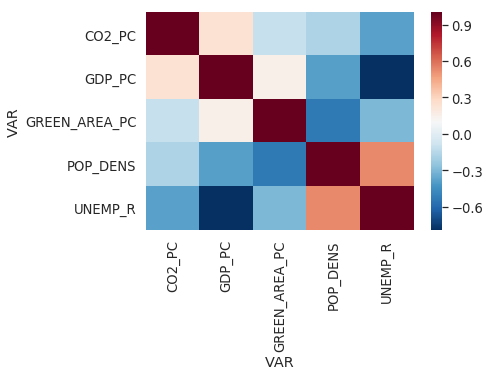

In [66]:
corr = df_subset.corr()
sns.heatmap(corr,cmap="RdBu_r")
plt.savefig("figures/example.pdf")
plt.savefig("figures/example.png")

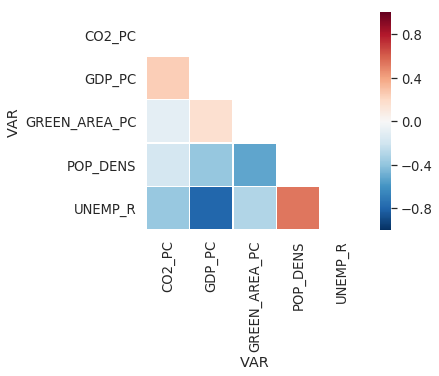

In [63]:
# Compute the correlation matrix
corr = df_subset.corr()

# Generate a mask for the upper triangle (hide the upper triangle)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,linewidths=.5,cmap="RdBu_r",vmin=-1,vmax=1)

plt.show()

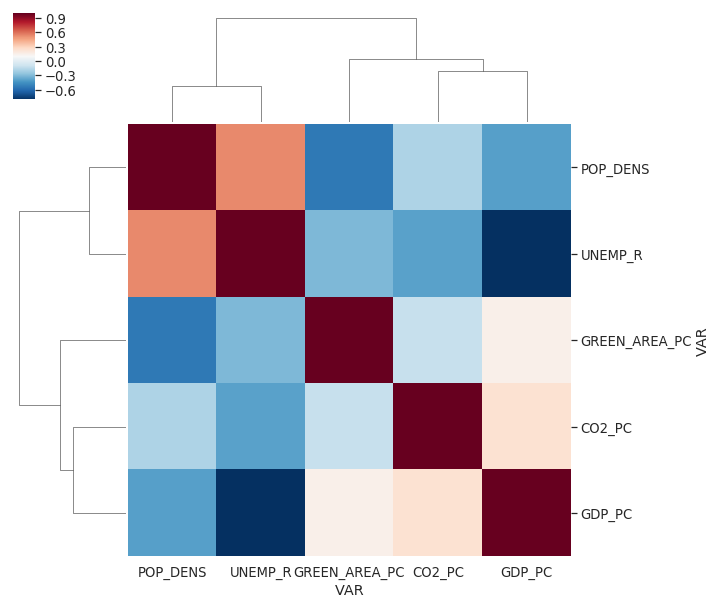

In [56]:
corr = df_subset.corr()
sns.clustermap(corr,cmap="RdBu_r")

## 7 Network data
Use gephi from an edgelist: https://gephi.org/

This is what we do at the corpnet group (corpnet.uva.nl)

In [57]:
Image(url="images/newtork.png")

## 8 When to use log scale
- Increase visibility (too many values with small values)
- **When we are plotting ratios or percentages** (because a ratio of 5/1 and a ratio of 1/5 look equally far from 1 in log scale)
- In a distribution: When we are trying to show that our distribution follows a exponential (lin-log scale), lognormal (log-lin scale) or power-law (log-log scale) distribution

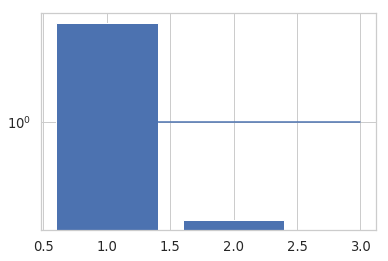

In [58]:
plt.bar([1,2],[5,0.2])
plt.plot([1,3],[1,1])
plt.yscale("log")

# 9. How to create an effective visualization
- Start with the idea of what you want to show: 
    - Which variables do you want to plot?
        - Continuous: Use length or position for the variables that need to be accurate. For less accurate variables color is okay.
        - Categorical: Use colors, shapes or both.
    - Which type of plot do you need?
        - Do you need to show distributions of categories? Maybe violinplot
        - Is it enough showing the mean and std? Maybe boxplot or barplot
        - Is there a relationship in the x-axis? Maybe a line plot
        - Is there not? Maybe a scatter plot
        - Is there geographical information? Maybe a map (probably combine it with a barplot if you have small countries)
    - Show the context:
        - Variability in the data (error bars)
        - Show the data, don't cheat with the axis.
   
- Think about the audience: 
    - Academic: They will read the caption and spend their time. You can condense information.
    - General public: You have 5 seconds to capture their attention. Simplify it and highlight the important information.

- Fix the last things with Inkscape (or Adobe Illustrator).
    - Save the figure always as pdf (or eps), so you can edit the parts separately.

- Follow this tips: https://www.tableau.com/about/blog/2016/5/5-tips-effective-visual-data-communication-54174
    - Less is more. Keep it simple! 
        - Do never use 3D bars or 3D effects that are not needed.
    - Pretty doesn’t mean effective. It may be distracting.
    - Use color judiciously:
        - Color for Numerical Scales? Use with Caution. 
        - Leverage Color Associations 
        - Use Bright Colors to Highlight
    - Geographical data doesn’t imply a map (related to color for numerical scales, and to size of countries)
    - Check your viz with the 5-second rule 
   
- Look for inspiration online!
    - Beautiful visualizations on text analysis: http://textvis.lnu.se/
    - https://fivethirtyeight.com/features/the-52-best-and-weirdest-charts-we-made-in-2016/
    - Inequality: https://www.nytimes.com/2017/11/17/upshot/income-inequality-united-states.html?mc=adintl&mcid=Facebook&ad-keywords=IntlAudDev&subid1=TAFI

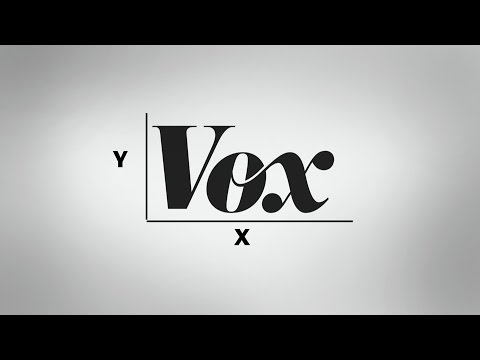

In [59]:
#Watch this video first to understand the project
from IPython.display import YouTubeVideo
YouTubeVideo('14VYnFhBKcY')